# Exercises

## NumPy

  1.  Read the documentation for `np.zeros`.
    1.  The generic way:  google "numpy zeros"
    2.  The python way:  `import numpy as np`, `help(np.zeros)`
    3.  The jupyter way:  `import numpy as np`, `?np.zeros`
    4.  The master way:   `import numpy as np`, `np.zeros( <after open-paren hit tab two or four times>`
    
  2.  We'll be interested in only a few `dtypes` in this class:  `np.float64`, `np.uint8`, `np.int64` [but there are more out there](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).  Create a NumPy array using `np.zeros` that has:
    1.  5 total elements in one dimension, floats
    2.  12 total elements in two dimensions, small unsigned ints
    3.  12 total elements in three dimensions, bigger signed ints
    4.  display each of these using the `show_array` function from above
  4.  `np.tile` is wonderfully useful to create "grided" patterns.  Let's explore it.
    1.  Create a simple 2x2 array called `myarr`.
    2.  Try the following versions of tile (execute the commands *and* check out the shape of the result):
      1. `np.tile(myarr, 1)`
      1. `np.tile(myarr, 2)`
      1. `np.tile(myarr, (1,1))`, 
      1. `np.tile(myarr, (2,1))`
      1. `np.tile(myarr, (1,2))`, 
      1. `np.tile(myarr, (2,2))`
      1.  Now, try to predict what `crazy_tile = np.tile(myarr, (3,1,1))` will do.  Now do it yourself.
    3.  With that final "tiled" array, trying to:
      1.  Generate the sums over visual "rows", "columns", and what I like to "panels" (the outermost grouping of row-column 2-D looking things).  Be careful to remember that `axis=0` means "outermost dimension".   Visually, this means "summing by looping over the panels of `crazy_tile`".
      2.  Take these sums (one at a time, not all together) and append them on to `crazy_tile` using `np.concatenate`.


In [2]:
# gathering the setup code.  
# if you are doing the exercises in another notebook, make sure these are executed
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

def show_array(arr):
    print(arr)
    for attr in ["size", "shape", "dtype"]:
        print("{:>5s} {}".format(attr, getattr(arr, attr)))  # getattr(obj, "attr") --> obj.attr

1

2

In [4]:
arr_float= np.zeros(5,dtype=np.float64)
show_array(arr_float)

[0. 0. 0. 0. 0.]
 size 5
shape (5,)
dtype float64


In [5]:
arr_ints = np.zeros((3,4),dtype=np.int8)
show_array(arr_ints)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
 size 12
shape (3, 4)
dtype int8


In [6]:
arr_intb =np.zeros((3,4),dtype=np.int64)
show_array(arr_intb)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
 size 12
shape (3, 4)
dtype int64


3

In [37]:
myarr=np.ones((3,3))*2
myarr

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [38]:
np.tile(myarr, 1)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [39]:
np.tile(myarr, 2)


array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [40]:
np.tile(myarr, (1,1))


array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [41]:
np.tile(myarr, (2,2))


array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [42]:
np.tile(myarr, (2,1))


array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [43]:
np.tile(myarr, (1,2))

array([[2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.]])

In [44]:
crazy_tile = np.tile(myarr, (3,1,1)) #duplicate the array
crazy_tile.shape

(3, 3, 3)

In [45]:
crazy_tile.sum(axis=1) # visual rows

array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [46]:
crazy_tile.sum(axis=2) # visual cols   (innermost)

array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]])

In [34]:
crazy_tile.sum(axis=0) # visual panels (outermost)

array([[ 3,  6],
       [ 9, 12]])

In [35]:
for axis in [0,1,2]:
    ax_sum = crazy_tile.sum(axis=axis, keepdims=True)
    show_array(np.concatenate([crazy_tile, ax_sum], axis=axis))

[[[ 1  2]
  [ 3  4]]

 [[ 1  2]
  [ 3  4]]

 [[ 1  2]
  [ 3  4]]

 [[ 3  6]
  [ 9 12]]]
 size 16
shape (4, 2, 2)
dtype int64
[[[1 2]
  [3 4]
  [4 6]]

 [[1 2]
  [3 4]
  [4 6]]

 [[1 2]
  [3 4]
  [4 6]]]
 size 18
shape (3, 3, 2)
dtype int64
[[[1 2 3]
  [3 4 7]]

 [[1 2 3]
  [3 4 7]]

 [[1 2 3]
  [3 4 7]]]
 size 18
shape (3, 2, 3)
dtype int64


## Matplotlib Exercises

  1. Use `np.zeros` and `np.ones` to create a square NumPy array that represents an image with a black square centered inside an outer white square.  Let the sides of the inner black square be 1/2 the length of the sides of the outer white square. Display your result (remember to set `interpolation=None`).
   
  
         
    
 

In [7]:
def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    ' helper to display an image, in grayscale, on an axes without grid/spine '
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

2.Add noise to the square you just made and display the result.  One way to do that is (1) create a white-noise image and (2) select either the "real" image point or the "white noise" image point.
         you'll end up generating two random things:  the white-noise image and a selector.  To *use* the selector, break out `np.where(condition, take_if_true, take_if_false)`.  In a basic case, all three arguments have the same shape.  At a position in the result (which has the same shape as the inputs), if `condition` holds (it is true), result gets a value from the second argument.  Otherwise, a value from the third argument goes into the result.  Read the docs for `np.where` and try simple example or two to get a feel for how it works.  Building small, demonstrative examples is a monumentally important skill!

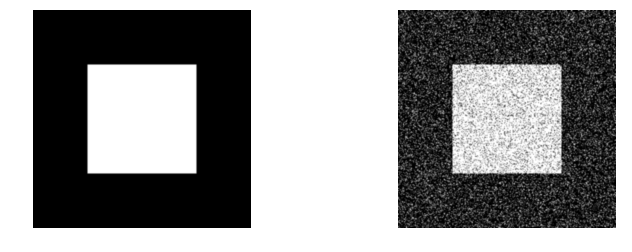

In [10]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes = axes.flat

size_arr = 300
size_iner=int(size_arr/2)
black= np.zeros((size_arr,size_arr),dtype=np.uint8)
white = np.ones((size_iner,size_iner))*255
black[75:225, 75:225]=white
my_gshow(next(axes),black)

white_noise =np.random.randint(0,256, size=(size_arr,size_arr))

image_noise = np.where(np.random.uniform(size=(size_arr,size_arr))>.3,black,white_noise) 

my_gshow(next(axes),image_noise)

 3.To preview some important ideas that we will get to in week 3, let's spend a few minutes interpreting an image as a function with a numerical derivative.  Specifically, we'll take a slice of values (across a row or column) and look at the differences between values from one pixel to the next.  `np.diff` is tailor-made to do this.  With your centered square from the first matplotlib exercise, take the `np.diff` across the center row and center column.  Graph the row and its 1st-difference with `plt.plot`.  *GOTCHA WARNING: `np.diff` has two gotchas.  (1)  calling it on `arr` will result in an array with `dtype==arr.dtype`.  The square you made is (possibly) a `np.uint8` array.  But, you can fix it!  (2)  `np.diff` results in an array smaller than the input because there is no difference for the first element.  There are a few ways around that.  Pick one.*

In [5]:
test=np.array([1,3,4,2,5,10])
print(np.diff(test))

[ 2  1 -2  3  5]


In [16]:
print(np.diff(white[75,:]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


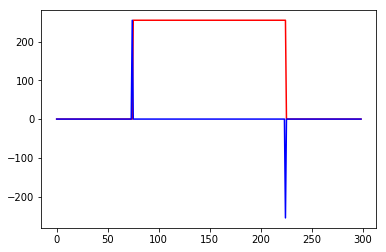

In [28]:
row_slice = black[75,:]

row_diff = np.diff(row_slice.astype(np.int16)) 


plt.plot(np.arange(299), row_slice[:-1], 'r') 
plt.plot(np.arange(299), row_diff, 'b');     


 3.  NumPy and Matplotlib Graduation Day.  Use `np.zeros`, `np.ones`, `np.tile`, and `imshow` to create and display a black-and-white chessboard.  Chessboards are an 8x8 grid of squares.

[[255.   0.]
 [  0. 255.]]


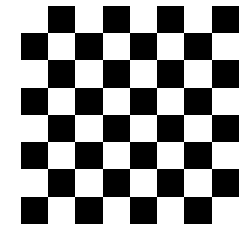

In [54]:
shess=np.eye(2) *255
board=np.tile(shess, (4,4))
print(shess)
my_gshow(plt.gca(), board, interpolation=None)

In [53]:
np.tile(shess, (4,4))

array([[255.,   0., 255.,   0., 255.,   0., 255.,   0.],
       [  0., 255.,   0., 255.,   0., 255.,   0., 255.],
       [255.,   0., 255.,   0., 255.,   0., 255.,   0.],
       [  0., 255.,   0., 255.,   0., 255.,   0., 255.],
       [255.,   0., 255.,   0., 255.,   0., 255.,   0.],
       [  0., 255.,   0., 255.,   0., 255.,   0., 255.],
       [255.,   0., 255.,   0., 255.,   0., 255.,   0.],
       [  0., 255.,   0., 255.,   0., 255.,   0., 255.]])

## Exercises with OpenCV and NumPy Together

Now, let's get a first look at the OpenCV documentation and practice making an OpenCV call.  We'll do much more of this next week!  Find the online documentation for `copyMakeBorder` and read it.  Yes, it might be painful - but, you'll need to develop this skill - reading online documentation - to master all that OpenCV (and other open-source software) has to offer.  

Experiment with different arguments to `copyMakeBorder` and compare histograms of the image before and after.  You might want to "turn off" `sharey` and `normed` from the code above to see the effect they have.

Above, we made three histograms in one row of a `subplots` set of axes.  Can you place the original and modified histograms over-under each other in two rows of a `subplots`?

Lastly, copy a region-of-interest from one part of the image to another, using NumPy array operations.  You'll need to deal with the fact that an assignment within NumPy arrays must be from a source and a destination with the same size (this isn't strictly true, but we'll use it as a simplification for this exercsise -- if you want to know more, look up broadcasting).

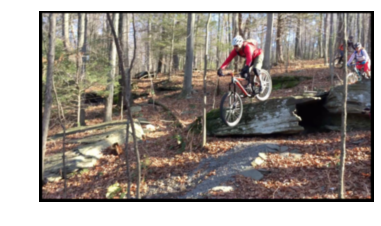

In [81]:
img_dir = 'common/'

img= cv2.imread(img_dir+'/data/farm-drop.jpg')
imgfinal=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_border = cv2.copyMakeBorder(imgfinal, 20,20,20,20, cv2.BORDER_CONSTANT)

my_show(plt.gca(),img_border,interpolation='bicubic')

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


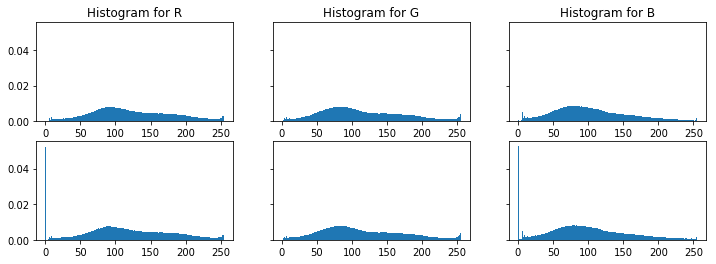

In [82]:



color_to_index = {"R":0, "G":1, "B":2}

fig, axes = plt.subplots(2,3,figsize=(12,4), sharey=True)

for column, color in enumerate(color_to_index):
    for row, img in enumerate([imgfinal, img_border]): 
        c = color_to_index[color]
        this_channel = img[:,:,c].ravel()

        axes[row, column].hist(this_channel, 256, normed=True)
        axes[0,column].set_title("Histogram for {}".format(color))


In [84]:
img.shape

(1192, 2088, 3)

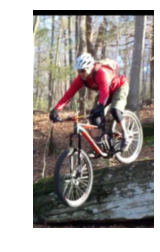

In [105]:
my_show(plt.gca(),img[:800,1050:1492])

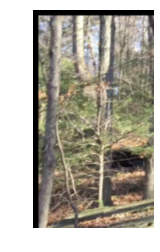

In [110]:
my_show(plt.gca(),img[:800,:442])

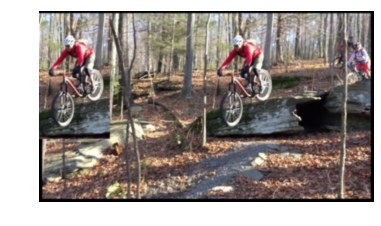

In [111]:
human = img[:800,1050:1492]
img[:800,:442]=human
my_show(plt.gca(),img)

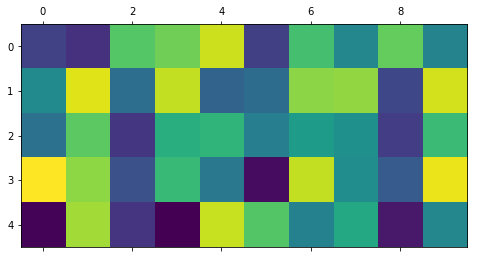

In [119]:
imag= np.random.randint(0,256,size=(5,10))
plt.matshow(imag)

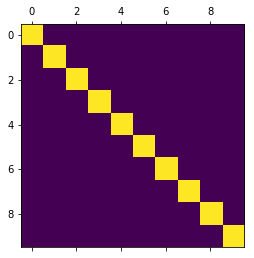

In [125]:
plt.matshow(np.eye(10,10)*255)

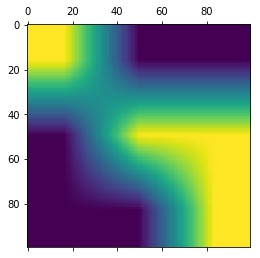

In [126]:
im=np.eye(3)
im[1,2]=1
out = cv2.resize(im,(100,100), interpolation=cv2.INTER_LINEAR)
plt.matshow(out,interpolation=None)